In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
%tensorflow_version 2.x
import tensorflow as tf

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

import pandas
import matplotlib.pyplot as plt
%matplotlib inline
! pip install plotly_express
import plotly_express as px

In [0]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score , roc_auc_score , f1_score, precision_score , average_precision_score , recall_score


import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier , OneVsOneClassifier 
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_val_predict , LeaveOneOut , ShuffleSplit,RandomizedSearchCV



In [0]:
project_path = "/gdrive/My Drive/AIML/Capstone Project/IPL_DATA_EXCEL_MACRO_SEASON_WISE/"

In [0]:
import os
os.chdir(project_path)

In [7]:
!ls -lrt

total 56103
-rw------- 1 root root 39599227 Apr 21 04:15 'Copy of Capstone-DataCreation_macro-v 0.10_HB.xlsm'
drwx------ 2 root root     4096 Apr 27 06:54  project_path
-rw------- 1 root root 17088903 Apr 27 09:45  IPL_DATA_RG.xlsx
-rw------- 1 root root     1846 Apr 27 10:07  gru.ckpt.index
-rw------- 1 root root   753188 Apr 27 10:07  gru.ckpt.data-00000-of-00001
-rw------- 1 root root       73 Apr 27 10:07  checkpoint


In [8]:
xls1=pd.ExcelFile(project_path+"IPL_DATA_RG.xlsx")
print(xls1.sheet_names)
sht = xls1.sheet_names # ['2008', '2009', '2010', '2011', '2012', '2013']

## reding the sheets

ipldata=pd.DataFrame()
for infile in sht:
    data = pandas.read_excel(xls1,infile)
    ipldata=ipldata.append(data) #,ignore_index=True)
    ipldata.sort_index(inplace=True)


['2008', '2009', '2010', '2011', '2012', '2013']


In [0]:
ipldata_bkp = ipldata.copy(deep=True)

In [10]:
ipldata.sample(2)

match_id  inning      batting_team  ... Result  bat_validator  bowl_validator
2648       331       2  Delhi Daredevils  ...      W            NaN             NaN
1652       189       2  Delhi Daredevils  ...      L            0.0             0.0

[2 rows x 90 columns]

In [11]:
ipldata.iloc[:,1:30].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43492 entries, 0 to 8835
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   inning            43492 non-null  int64 
 1   batting_team      43492 non-null  object
 2   bowling_team      43492 non-null  object
 3   over              43492 non-null  int64 
 4   ball              43492 non-null  int64 
 5   batsman           43492 non-null  object
 6   non_striker       43492 non-null  object
 7   bowler            43492 non-null  object
 8   is_super_over     43492 non-null  int64 
 9   wide_runs         43492 non-null  int64 
 10  bye_runs          43492 non-null  int64 
 11  legbye_runs       43492 non-null  int64 
 12  noball_runs       43492 non-null  int64 
 13  penalty_runs      43492 non-null  int64 
 14  batsman_runs      43492 non-null  int64 
 15  extra_runs        43492 non-null  int64 
 16  total_runs        43492 non-null  int64 
 17  player_dismis

In [12]:
print("Total matches :- ",ipldata.match_id.nunique())

Total matches :-  378


In [13]:
ipldata.shape

(43492, 90)

In [14]:
ipldata.drop(columns=['bat_validator','bowl_validator'],axis=1).isnull().sum().sum()

124632

In [15]:
ipldata.iloc[37:89].isnull().sum()

match_id          0
inning            0
batting_team      0
bowling_team      0
over              0
                 ..
bowl10_balls      0
bowl10_runs       0
Result            0
bat_validator     0
bowl_validator    0
Length: 90, dtype: int64

In [16]:
ipldata.sample(3)

match_id  inning  ... bat_validator bowl_validator
5369       427       2  ...           0.0            0.0
929        127       2  ...           0.0            0.0
3492        91       2  ...           NaN            NaN

[3 rows x 90 columns]

#################################  **IPLDATA VISUALIZATION **** **    #############################

In [18]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



<Figure size 1440x1440 with 0 Axes>

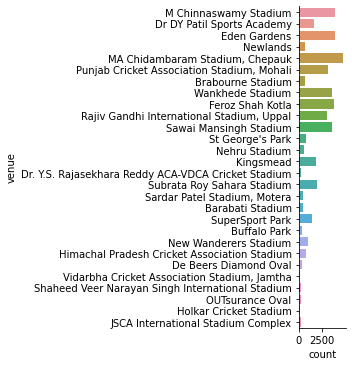

In [19]:
plt.figure(figsize=(20,20))

sns.factorplot(y='venue',kind='count',data=ipldata)

plt.show()

In [20]:
px.pie(ipldata,'batting_team',width=600,height=600) 

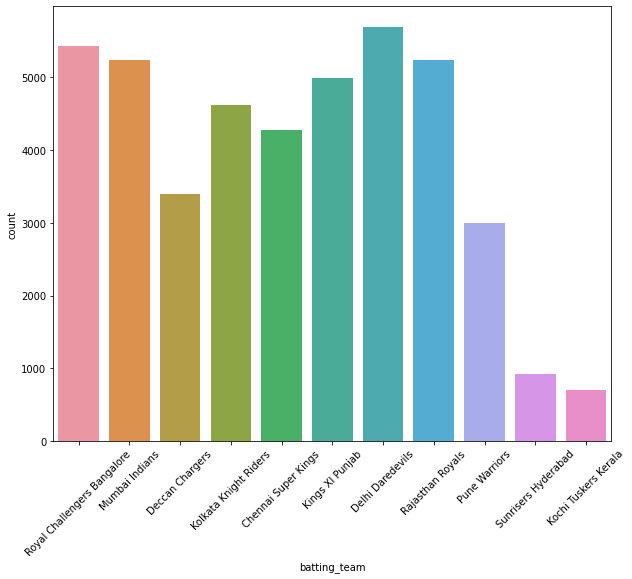

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.countplot(x='batting_team', data=ipldata)
plt.xticks(rotation=45)
plt.show()

In [22]:
px.pie(ipldata,'toss_winner',width=700,height=700) 

In [23]:
px.pie(ipldata,'toss_decision',width=600,height=600) 

In [24]:
px.pie(ipldata,'winner',width=700,height=700) 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



<Figure size 3600x4320 with 0 Axes>

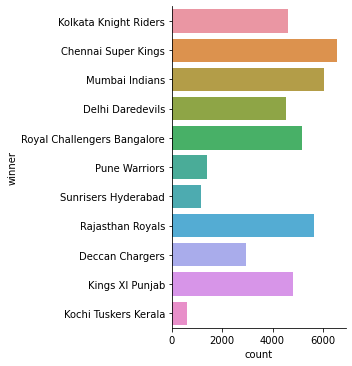

In [25]:
## MOST SUCCESSFULL IPL TEAM

plt.figure(figsize=(50,60))

sns.factorplot(y='winner',kind='count',data=ipldata)

plt.show()

In [26]:
px.pie(ipldata,'bowling_team',width=600,height=600) 

In [27]:
px.histogram(ipldata,'bowling_team',width=1000,height=400)

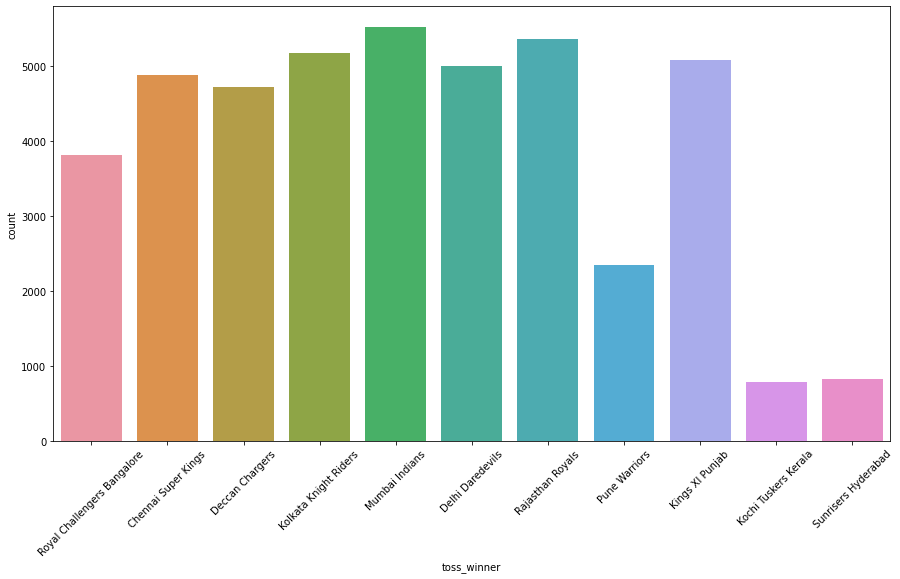

In [28]:
plt.figure(figsize=(15,8))
sns.countplot(x='toss_winner', data=ipldata)
plt.xticks(rotation=45)
plt.show()

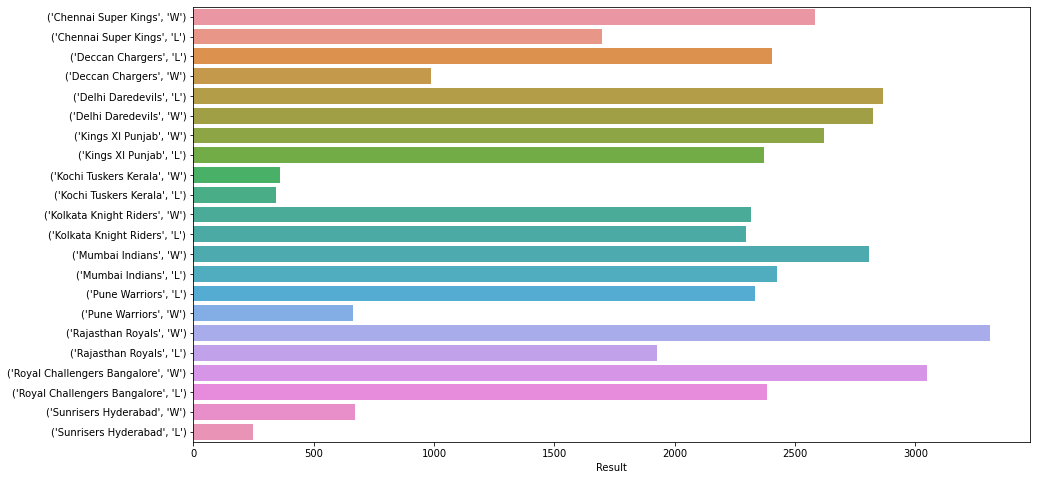

In [29]:
#sns.countplot(y='winner', data = matches)
#plt.show
plt.figure(figsize=(15,8))
data = ipldata.groupby('batting_team').Result.value_counts()
sns.barplot(y = data.index, x = data,orient='h');

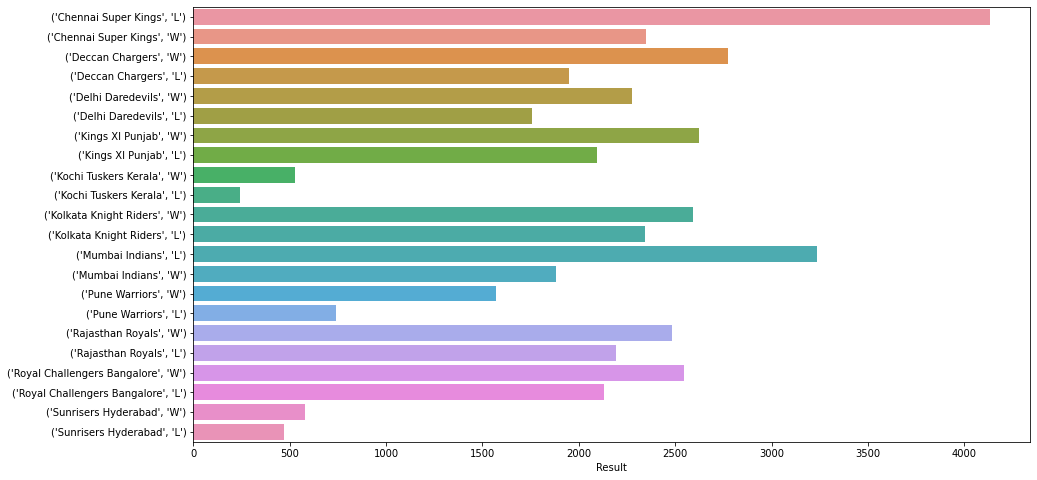

In [30]:
#sns.countplot(y='winner', data = matches)
#plt.show
plt.figure(figsize=(15,8))
data = ipldata.groupby('bowling_team').Result.value_counts()
sns.barplot(y = data.index, x = data,orient='h');

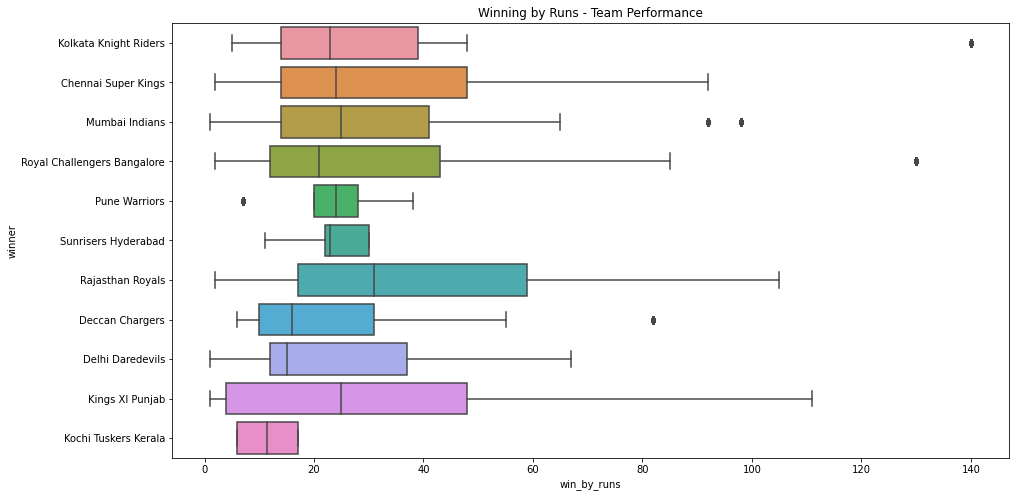

In [36]:
plt.figure(figsize=(15,8))
#ax.set_ylim([0,20])
plt.title("Winning by Runs - Team Performance")
#top_players.plot.bar()
sns.boxplot(y = 'winner', x = 'win_by_runs', data=ipldata[ipldata['win_by_runs']>0], orient = 'h'); #palette="Blues");
plt.show()

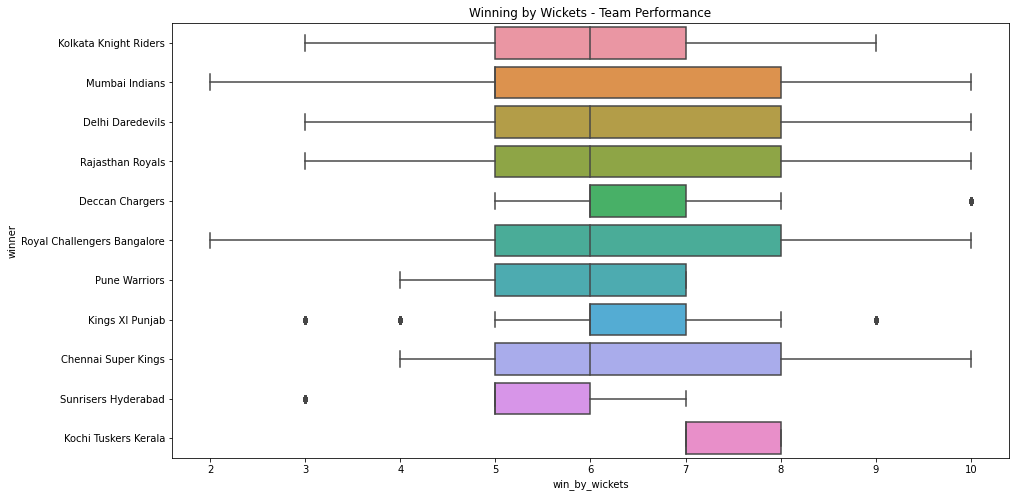

In [37]:
plt.figure(figsize=(15,8))
#ax.set_ylim([0,20])
plt.title("Winning by Wickets - Team Performance")
#top_players.plot.bar()
sns.boxplot(y = 'winner', x = 'win_by_wickets', data=ipldata[ipldata['win_by_wickets']>0], orient = 'h'); #palette="Blues");
plt.show()

In [39]:
xls1=pd.ExcelFile(project_path+"IPL_DATA_RG.xlsx")
print(xls1.sheet_names)
sht = xls1.sheet_names # ['2008', '2009', '2010', '2011', '2012', '2013']
df_2008 = pandas.read_excel(xls1,'2008')
df_2009 = pandas.read_excel(xls1,'2009')
df_2010 = pandas.read_excel(xls1,'2010')
df_2011 = pandas.read_excel(xls1,'2011')
df_2012 = pandas.read_excel(xls1,'2012')
df_2013 = pandas.read_excel(xls1,'2013')

['2008', '2009', '2010', '2011', '2012', '2013']


In [0]:
df_2008['season'] = 2008
df_2009['season'] = 2009
df_2010['season'] = 2010
df_2011['season'] = 2011
df_2012['season'] = 2012
df_2013['season'] = 2012
df_matches = pd.concat([df_2008,df_2009,df_2010,df_2011,df_2012,df_2013],axis=0)

In [41]:
# Group by match_id and inning and get the sum of total_runs and again group it by match_id and get the sum to get the total score in both the innings
df_matchwise_runs = ipldata.groupby(['match_id','inning']).sum()['total_runs'].reset_index().groupby('match_id').sum()['total_runs'].reset_index()
# Create a new column, average_runs by dividing the total runs by 2
df_matchwise_runs['average_runs'] = df_matchwise_runs['total_runs']/2
# Drop the column, total_runs
df_matchwise_runs.drop('total_runs', axis=1, inplace=True)
# Take id and season from df_matches DataFrame
df_id = df_matches[['match_id','season']]
# Rename the id column to match it with the id column of df_matchwise_runs
df_id = df_id.rename(columns={'id':'match_id'})
# Join the id and the matchwise runs DataFrames
df_matchwise_runs = pd.merge(df_id, df_matchwise_runs, on='match_id', how='inner')
# Drop the match_id column
df_matchwise_runs.drop('match_id', axis=1, inplace=True)
# Get the season average by grouping the data by season and taking mean of the average_runs colum
season_average = df_matchwise_runs.groupby('season').mean().reset_index()
# Round the average_runs and convert it to integer
season_average.average_runs = round(season_average.average_runs).astype(int)
# Display the DataFrame
season_average

season  average_runs
0    2008            76
1    2009            69
2    2010            78
3    2011            71
4    2012            72

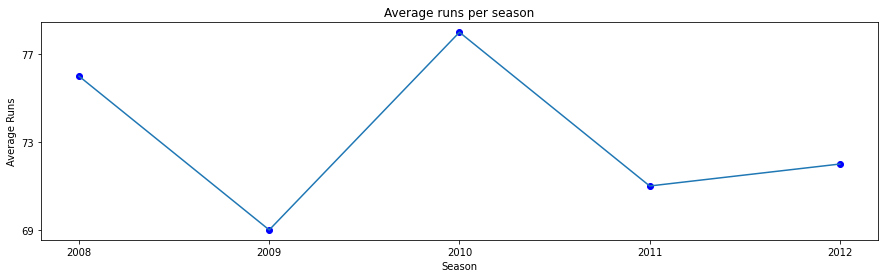

In [42]:
plt.figure(figsize=(15,4))
plt.plot(season_average.season,season_average.average_runs, 'bo')
plt.plot(season_average.season,season_average.average_runs)
plt.title('Average runs per season')
plt.xlabel('Season')
plt.ylabel('Average Runs')
plt.xticks(np.arange(np.min(season_average.season), np.max(season_average.season)+1, step=1)) 
plt.yticks(np.arange(np.min(season_average.average_runs), np.max(season_average.average_runs)+1, step=4))
plt.show()

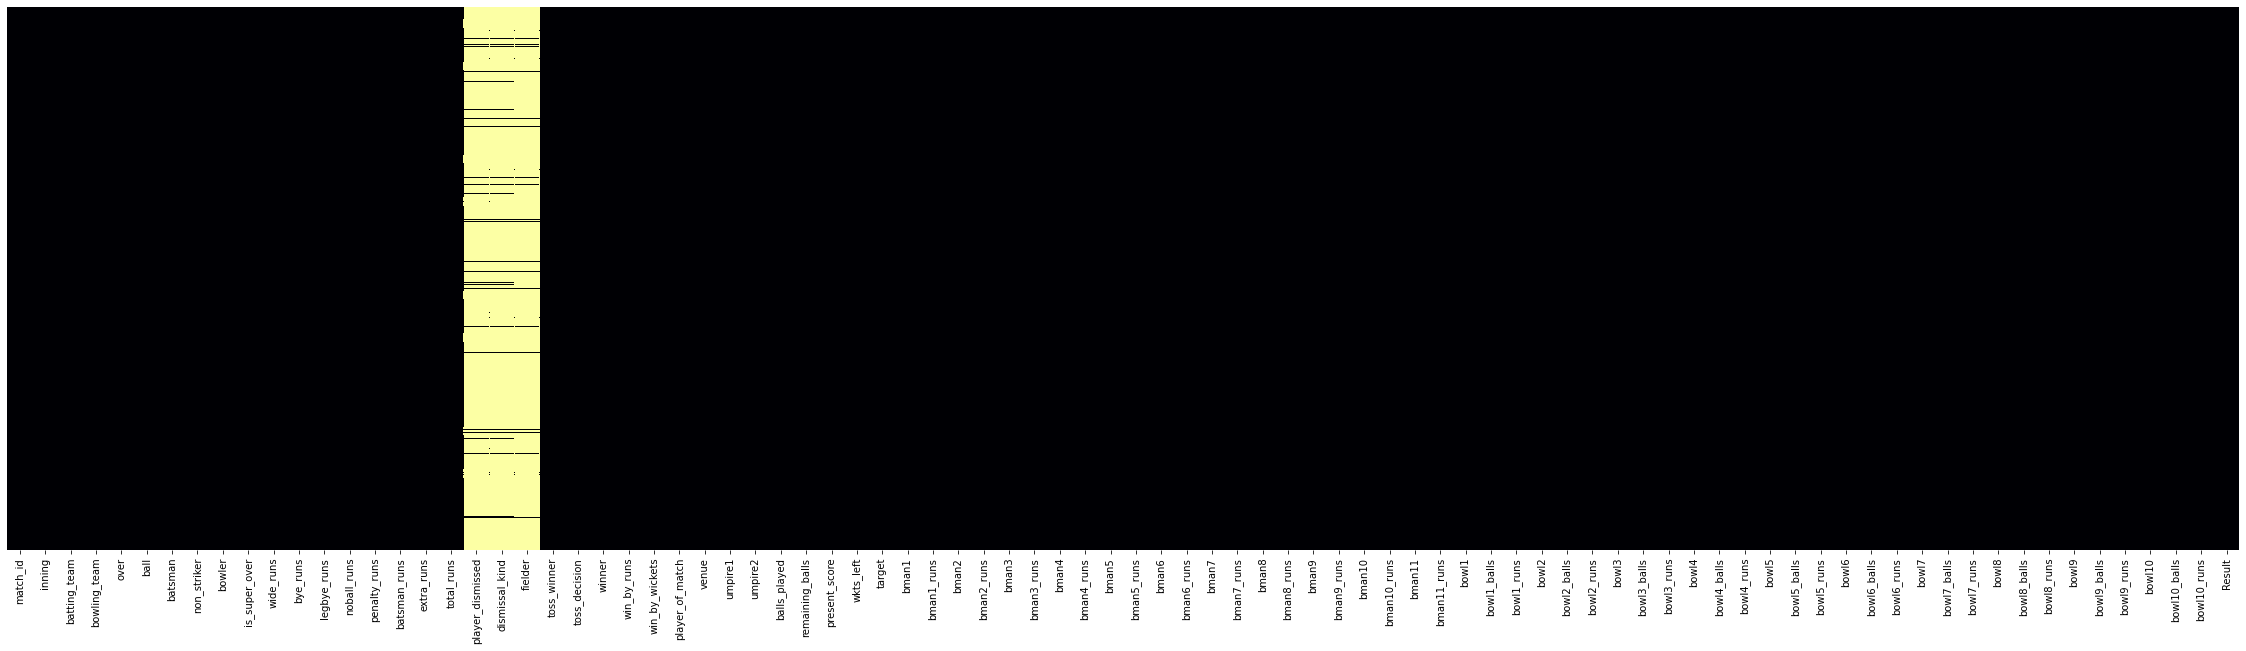

In [43]:
## finding the null and missing values in the database
plt.figure(figsize=(40,10))
sns.heatmap(ipldata.drop(columns=['bat_validator','bowl_validator']).isnull(),xticklabels=True,yticklabels=False,cbar=False,cmap='inferno') 

In [0]:
def CreateData(ipldata):
  print("The shape of the IPL data is ",ipldata.shape)
  no_of_matches=ipldata['match_id'].nunique()
  allmatches=ipldata.match_id.unique()
  allmatches=np.sort(allmatches)
  midindex=int(no_of_matches*0.7)
  print("The mid value is ", midindex)
  print("Splitting the data")
  Xtrain=ipldata[(ipldata['match_id']>allmatches[0]-1) & (ipldata['match_id']<=allmatches[midindex])]
  Xtest=ipldata[(ipldata['match_id']>allmatches[midindex]) & (ipldata['match_id']<=allmatches[no_of_matches-1])]
  #X_train = Xtrain[['match_id','over','ball','balls_played','bman1','bman1_runs','bman2','bman2_runs','bman3','bman3_runs','bman4','bman4_runs','bman5','bman5_runs','bman6','bman6_runs','bman7','bman7_runs','bman8','bman8_runs','bman9','bman9_runs','bman10','bman10_runs','bman11','bman11_runs','bowl1','bowl1_balls','bowl1_runs','bowl2','bowl2_balls','bowl2_runs','bowl3','bowl3_balls','bowl3_runs','bowl4','bowl4_balls','bowl4_runs','bowl5','bowl5_balls','bowl5_runs','bowl6','bowl6_balls','bowl6_runs','bowl7','bowl7_balls','bowl7_runs','bowl8','bowl8_balls','bowl8_runs','bowl9','bowl9_balls','bowl9_runs','bowl10','bowl10_balls','bowl10_runs','extra_runs','batsman_runs','remaining_balls','wkts_left','present_score','target','Result']]
  #X_test = Xtest[['match_id','over','ball','balls_played','bman1','bman1_runs','bman2','bman2_runs','bman3','bman3_runs','bman4','bman4_runs','bman5','bman5_runs','bman6','bman6_runs','bman7','bman7_runs','bman8','bman8_runs','bman9','bman9_runs','bman10','bman10_runs','bman11','bman11_runs','bowl1','bowl1_balls','bowl1_runs','bowl2','bowl2_balls','bowl2_runs','bowl3','bowl3_balls','bowl3_runs','bowl4','bowl4_balls','bowl4_runs','bowl5','bowl5_balls','bowl5_runs','bowl6','bowl6_balls','bowl6_runs','bowl7','bowl7_balls','bowl7_runs','bowl8','bowl8_balls','bowl8_runs','bowl9','bowl9_balls','bowl9_runs','bowl10','bowl10_balls','bowl10_runs','extra_runs','batsman_runs','remaining_balls','wkts_left','present_score','target','Result']]
  X_train = Xtrain[['match_id','over','ball','balls_played','bman1','bman2','bman3','bman4','bman5','bman6','bman7','bman8','bman9','bman10','bman11','bowl1','bowl2','bowl3','bowl4','bowl5','bowl6','bowl7','bowl8','bowl9','bowl10','extra_runs','batsman_runs','remaining_balls','wkts_left','present_score','target','Result']]
  X_test = Xtest[['match_id','over','ball','balls_played','bman1','bman2','bman3','bman4','bman5','bman6','bman7','bman8','bman9','bman10','bman11','bowl1','bowl2','bowl3','bowl4','bowl5','bowl6','bowl7','bowl8','bowl9','bowl10','extra_runs','batsman_runs','remaining_balls','wkts_left','present_score','target','Result']]
  X_train=pd.DataFrame(X_train)
  X_train.set_index("over", inplace=True,append=True, drop=False)
  X_test=pd.DataFrame(X_test)
  X_test.set_index("over", inplace=True,append=True, drop=False)
  print("Preparing Training and Test data")
  from sklearn import preprocessing
  label_encoder = preprocessing.LabelEncoder() 
  X_train['Result']=label_encoder.fit_transform(X_train['Result'])
  X_test['Result']=label_encoder.fit_transform(X_test['Result'])
  X_train_copy=X_train.copy()
  X_test_copy=X_test.copy()
  y_train = X_train[['Result']]
  X_train = X_train.drop('Result', axis=1)
  y_test = X_test[['Result']]
  X_test = X_test.drop('Result', axis=1)
  print("The shape of Training data is ", X_train.shape)
  print("The shape of Training data is ", X_test.shape)
  return X_train, X_test,y_train,y_test,X_test_copy
  


  
  




In [46]:
X_train,X_test,y_train,y_test,X_test_copy=CreateData(ipldata=ipldata)

The shape of the IPL data is  (43492, 90)
The mid value is  264
Splitting the data
Preparing Training and Test data
The shape of Training data is  (30281, 31)
The shape of Training data is  (13211, 31)


In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
def CalculateAccuracy(X_train,X_test,y_train,y_test):
  import sklearn
  from sklearn.linear_model import LogisticRegression
  from sklearn.naive_bayes import GaussianNB
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.svm import SVC
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.ensemble import RandomForestClassifier
  from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
  from xgboost import XGBClassifier
  models = []
  models.append(('LR', LogisticRegression()))
  models.append(('NB', naive_bayes.GaussianNB()))
  models.append(('KNN', KNeighborsClassifier()))
  models.append(('SVM', SVC()))
  models.append(('CART', DecisionTreeClassifier(max_depth=10)))
  models.append(('RF', RandomForestClassifier(max_depth=10)))
  models.append(('ADA', ensemble.AdaBoostClassifier()))
  models.append(('BAG', ensemble.BaggingClassifier()))
  models.append(('GradBoost', ensemble.GradientBoostingClassifier()))
  models.append(('NB_ber',  naive_bayes.BernoulliNB()))
  train_score = []
  names = []
  test_score = []
  for name, model in models:
    model = model.fit(X_train, y_train.values.ravel())
    msg = "%s: %f (%f) " % (name, model.score(X_train, y_train.values.ravel()), model.score(X_test, y_test.values.ravel()))
    #names.append(model._class_)
    train_score.append(model.score(X_train, y_train.values.ravel()))
    test_score.append(model.score(X_test, y_test.values.ravel()))
    print(msg)



In [50]:
CalculateAccuracy(X_train,X_test,y_train,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LR: 0.786467 (0.779880) 
NB: 0.545226 (0.540837) 
KNN: 0.839834 (0.695784) 
SVM: 0.806248 (0.720612) 
CART: 0.876160 (0.717130) 
RF: 0.840560 (0.635228) 
ADA: 0.818434 (0.490652) 
BAG: 0.999472 (0.678753) 
GradBoost: 0.860110 (0.647264) 
NB_ber: 0.588884 (0.572780) 


In [0]:
def preparedatalstm(X_train,X_test,y_train,y_test):
  y_train_copy=y_train.copy()
  y_test_copy=y_test.copy()
  from tensorflow.keras.utils import to_categorical
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  num_classes = y_test.shape[1]
  X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
  X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
  print(X_train.shape)
  print(X_test.shape)
  return X_train,X_test,y_train,y_test,y_train_copy,y_test_copy,num_classes


  

In [52]:
X_train,X_test,y_train,y_test,y_train_copy,y_test_copy,num_classes=preparedatalstm(X_train,X_test,y_train,y_test)

(30281, 1, 31)
(13211, 1, 31)


In [53]:
tf.keras.backend.clear_session()
LSTMcheckpoint_path = "project_path"+"/lstm.ckpt"
lstmodel = tf.keras.Sequential()
lstmodel.add(tf.keras.layers.LSTM(256, input_shape=(1, X_test.shape[2])))
lstmodel.add(tf.keras.layers.Dense(10))
lstmodel.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=LSTMcheckpoint_path,
                                                 save_weights_only=True,
                                                 monitor='loss',
                                                 mode = 'min',
                                                 save_best_only=True,
                                                 verbose=1)
lstmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

lstmodel.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=64, callbacks=[cp_callback])
# Loads the weights
lstmodel.load_weights(LSTMcheckpoint_path)
loss_and_metrics = lstmodel.evaluate(X_train, y_train)
print(loss_and_metrics)
loss_and_metrics = lstmodel.evaluate(X_test, y_test)
print(loss_and_metrics)

Epoch 1/100
468/474 [============================>.] - ETA: 0s - loss: 0.4899 - accuracy: 0.7525
Epoch 00001: loss improved from inf to 0.48969, saving model to project_path/lstm.ckpt
474/474 [==============================] - 4s 9ms/step - loss: 0.4897 - accuracy: 0.7527 - val_loss: 0.4772 - val_accuracy: 0.7761
Epoch 2/100
471/474 [============================>.] - ETA: 0s - loss: 0.4353 - accuracy: 0.7822
Epoch 00002: loss improved from 0.48969 to 0.43546, saving model to project_path/lstm.ckpt
474/474 [==============================] - 4s 8ms/step - loss: 0.4355 - accuracy: 0.7823 - val_loss: 0.4770 - val_accuracy: 0.7771
Epoch 3/100
470/474 [============================>.] - ETA: 0s - loss: 0.4317 - accuracy: 0.7844
Epoch 00003: loss improved from 0.43546 to 0.43234, saving model to project_path/lstm.ckpt
474/474 [==============================] - 4s 8ms/step - loss: 0.4323 - accuracy: 0.7844 - val_loss: 0.4713 - val_accuracy: 0.7809
Epoch 4/100
473/474 [==========================

In [54]:
tf.keras.backend.clear_session()
GRUcheckpoint_path = project_path+"/gru.ckpt"
grumodel = tf.keras.Sequential()
grumodel.add(tf.keras.layers.GRU(128, input_shape=(1, X_test.shape[2])))
grumodel.add(tf.keras.layers.Dense(5))
grumodel.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=GRUcheckpoint_path,
                                                 save_weights_only=True,
                                                 monitor='loss',
                                                 mode = 'min',
                                                 save_best_only=True,
                                                 verbose=1)
grumodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

grumodel.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32, callbacks=[cp_callback])

# Loads the weights
grumodel.load_weights(GRUcheckpoint_path)
loss_and_metrics = grumodel.evaluate(X_train, y_train)
print(loss_and_metrics)
loss_and_metrics = grumodel.evaluate(X_test, y_test)
print(loss_and_metrics)

Epoch 1/100
933/947 [============================>.] - ETA: 0s - loss: 0.4855 - accuracy: 0.7603
Epoch 00001: loss improved from inf to 0.48508, saving model to /gdrive/My Drive/AIML/Capstone Project/IPL_DATA_EXCEL_MACRO_SEASON_WISE//gru.ckpt
947/947 [==============================] - 4s 4ms/step - loss: 0.4851 - accuracy: 0.7604 - val_loss: 0.4802 - val_accuracy: 0.7770
Epoch 2/100
941/947 [============================>.] - ETA: 0s - loss: 0.4375 - accuracy: 0.7829
Epoch 00002: loss improved from 0.48508 to 0.43785, saving model to /gdrive/My Drive/AIML/Capstone Project/IPL_DATA_EXCEL_MACRO_SEASON_WISE//gru.ckpt
947/947 [==============================] - 3s 3ms/step - loss: 0.4379 - accuracy: 0.7827 - val_loss: 0.4772 - val_accuracy: 0.7765
Epoch 3/100
928/947 [============================>.] - ETA: 0s - loss: 0.4348 - accuracy: 0.7855
Epoch 00003: loss improved from 0.43785 to 0.43476, saving model to /gdrive/My Drive/AIML/Capstone Project/IPL_DATA_EXCEL_MACRO_SEASON_WISE//gru.ckpt
9

NotFoundError: ignored

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [0]:
def CalculateMetrics(lstmodel, grumodel, X_test,y_test_copy):
  y_predictlstm=np.argmax(lstmodel.predict(X_test),axis=1)
  y_predictgru=np.argmax(grumodel.predict(X_test),axis=1)
  y_check=np.reshape(np.array(y_test_copy),(len(y_test_copy)))
  print("Calculate Metrics for LSTM Model")
  print("The accuracy of LSTM model is ", accuracy_score(y_predictlstm,y_check))
  print("The precision of LSTM model is ",precision_score(y_predictlstm, y_check))
  print("The recall of LSTM model is ", recall_score(y_predictlstm, y_check))
  print("The F1 score of LSTM model is ", f1_score(y_predictlstm, y_check))
  print("Calculate Metrics for GRU Model")
  print("The accuracy of GRU model is ", accuracy_score(y_predictgru,y_check))
  print("The precision of GRU model is ",precision_score(y_predictgru, y_check))
  print("The recall of GRU model is ", recall_score(y_predictgru, y_check))
  print("The F1 score of GRU model is ", f1_score(y_predictgru, y_check))
  acc_lstm=accuracy_score(y_predictlstm,y_check)
  pre_lstm=precision_score(y_predictlstm, y_check)
  rec_lstm=recall_score(y_predictlstm, y_check)
  f1_lstm=f1_score(y_predictlstm, y_check)
  acc_gru=accuracy_score(y_predictgru,y_check)
  pre_gru=precision_score(y_predictgru, y_check)
  rec_gru=recall_score(y_predictgru, y_check)
  f1_gru=f1_score(y_predictgru, y_check)
  return acc_lstm, pre_lstm, rec_lstm,f1_lstm,acc_gru,pre_gru,rec_gru,f1_gru

  

In [57]:
acc_lstm,pre_lstm,rec_lstm,f1_lstm,acc_gru,pre_gru,rec_gru,f1_gru=CalculateMetrics(lstmodel, grumodel, X_test,y_test_copy)

Calculate Metrics for LSTM Model
The accuracy of LSTM model is  0.7490727424116267
The precision of LSTM model is  0.8475256353098529
The recall of LSTM model is  0.7135885885885885
The F1 score of LSTM model is  0.7748114937843896
Calculate Metrics for GRU Model
The accuracy of GRU model is  0.731511619105291
The precision of GRU model is  0.8891365730420567
The recall of GRU model is  0.6811247723132969
The F1 score of GRU model is  0.7713530587249404


In [0]:
def Calculate1_5overs(X_test_copy):
  firstfivesamples=X_test_copy[(X_test_copy['over']>0) & (X_test_copy['over']<6)]
  y_checkfive=firstfivesamples['Result']
  firstfivesamples=firstfivesamples.drop('Result', axis=1)
  firstfivesamples=scaler.fit_transform(firstfivesamples)
  firstfivesamples=np.reshape(firstfivesamples, (firstfivesamples.shape[0], 1, firstfivesamples.shape[1]))
  y_predictfive=np.argmax(lstmodel.predict(firstfivesamples),axis=1)
  y_predictfivegru=np.argmax(grumodel.predict(firstfivesamples),axis=1)
  print("Calculate Metrics for LSTM Model")
  print("The accuracy of the lstm model for the first five overs is: ",accuracy_score(y_checkfive,y_predictfive))
  print("The recall of the lstm model for the first five overs is: ",recall_score(y_checkfive,y_predictfive))
  print("The precision of the lstm model for the first five overs is :",precision_score(y_checkfive, y_predictfive))
  print("The f1 score of the lstm model for the first five overs is: ",f1_score(y_checkfive, y_predictfive))
  print("Calculate Metrics for GRU Model")
  print("The accuracy of the gru model for the first five overs is: ",accuracy_score(y_checkfive,y_predictfivegru))
  print("The recall of the gru model for the first five overs is: ",recall_score(y_checkfive,y_predictfivegru))
  print("The precision of the gru model for the first five overs is :",precision_score(y_checkfive, y_predictfivegru))
  print("The f1 score of the gru model for the first five overs is: ",f1_score(y_checkfive, y_predictfivegru))
  acc_lstm=accuracy_score(y_predictfive,y_checkfive)
  pre_lstm=precision_score(y_predictfive, y_checkfive)
  rec_lstm=recall_score(y_predictfive, y_checkfive)
  f1_lstm=f1_score(y_predictfive, y_checkfive)
  acc_gru=accuracy_score(y_predictfivegru,y_checkfive)
  pre_gru=precision_score(y_predictfivegru, y_checkfive)
  rec_gru=recall_score(y_predictfivegru, y_checkfive)
  f1_gru=f1_score(y_predictfivegru, y_checkfive)
  return acc_lstm, pre_lstm, rec_lstm,f1_lstm,acc_gru,pre_gru,rec_gru,f1_gru

In [59]:
acc_lstm15,pre_lstm15,rec_lstm15,f1_lstm15,acc_gru15,pre_gru15,rec_gru15,f1_gru15=Calculate1_5overs(X_test_copy)

Calculate Metrics for LSTM Model
The accuracy of the lstm model for the first five overs is:  0.6555240793201134
The recall of the lstm model for the first five overs is:  0.6228974498100922
The precision of the lstm model for the first five overs is : 0.6878370281605752
The f1 score of the lstm model for the first five overs is:  0.65375854214123
Calculate Metrics for GRU Model
The accuracy of the gru model for the first five overs is:  0.6560906515580737
The recall of the gru model for the first five overs is:  0.6446011937059143
The precision of the gru model for the first five overs is : 0.680022896393818
The f1 score of the gru model for the first five overs is:  0.6618384401114207


In [0]:
def Calculate5_10overs(X_test_copy):
  fivetensamples=X_test_copy[(X_test_copy['over']>5) & (X_test_copy['over']<11)]
  y_checkten=fivetensamples['Result']
  fivetensamples=fivetensamples.drop('Result', axis=1)
  fivetensamples=scaler.fit_transform(fivetensamples)
  fivetensamples=np.reshape(fivetensamples, (fivetensamples.shape[0], 1, fivetensamples.shape[1]))
  y_predictten=np.argmax(lstmodel.predict(fivetensamples),axis=1)
  y_predicttengru=np.argmax(grumodel.predict(fivetensamples),axis=1)
  print("Calculate Metrics for LSTM Model")
  print("The accuracy of the lstm model for the first five overs is: ",accuracy_score(y_checkten,y_predictten))
  print("The recall of the lstm model for the first five overs is: ",recall_score(y_checkten,y_predictten))
  print("The precision of the lstm model for the first five overs is :",precision_score(y_checkten, y_predictten))
  print("The f1 score of the lstm model for the first five overs is: ",f1_score(y_checkten, y_predictten))
  print("Calculate Metrics for GRU Model")
  print("The accuracy of the gru model for the first five overs is: ",accuracy_score(y_checkten,y_predicttengru))
  print("The recall of the gru model for the first five overs is: ",recall_score(y_checkten,y_predicttengru))
  print("The precision of the gru model for the first five overs is :",precision_score(y_checkten, y_predicttengru))
  print("The f1 score of the gru model for the first five overs is: ",f1_score(y_checkten, y_predicttengru))
  acc_lstm=accuracy_score(y_predictten,y_checkten)
  pre_lstm=precision_score(y_predictten, y_checkten)
  rec_lstm=recall_score(y_predictten, y_checkten)
  f1_lstm=f1_score(y_predictten, y_checkten)
  acc_gru=accuracy_score(y_predicttengru,y_checkten)
  pre_gru=precision_score(y_predicttengru, y_checkten)
  rec_gru=recall_score(y_predicttengru, y_checkten)
  f1_gru=f1_score(y_predicttengru, y_checkten)
  return acc_lstm, pre_lstm, rec_lstm,f1_lstm,acc_gru,pre_gru,rec_gru,f1_gru

In [61]:
acc_lstm510,pre_lstm510,rec_lstm510,f1_lstm510,acc_gru510,pre_gru510,rec_gru510,f1_gru510=Calculate5_10overs(X_test_copy)

Calculate Metrics for LSTM Model
The accuracy of the lstm model for the first five overs is:  0.6966810966810967
The recall of the lstm model for the first five overs is:  0.6002202643171806
The precision of the lstm model for the first five overs is : 0.7703180212014135
The f1 score of the lstm model for the first five overs is:  0.6747137109254101
Calculate Metrics for GRU Model
The accuracy of the gru model for the first five overs is:  0.6952380952380952
The recall of the gru model for the first five overs is:  0.625
The precision of the gru model for the first five overs is : 0.7516556291390728
The f1 score of the gru model for the first five overs is:  0.682501503307276


In [0]:
def Calculate10_15overs(X_test_copy):
  tenfifteensamples=X_test_copy[(X_test_copy['over']>10) & (X_test_copy['over']<16)]
  y_checkfifteen=tenfifteensamples['Result']
  tenfifteensamples=tenfifteensamples.drop('Result', axis=1)
  tenfifteensamples=scaler.fit_transform(tenfifteensamples)
  tenfifteensamples=np.reshape(tenfifteensamples, (tenfifteensamples.shape[0], 1, tenfifteensamples.shape[1]))
  y_predictfifteen=np.argmax(lstmodel.predict(tenfifteensamples),axis=1)
  y_predictfifteengru=np.argmax(grumodel.predict(tenfifteensamples),axis=1)
  print("Calculate Metrics for LSTM Model")
  print("The accuracy of the lstm model for the first five overs is: ",accuracy_score(y_checkfifteen,y_predictfifteen))
  print("The recall of the lstm model for the first five overs is: ",recall_score(y_checkfifteen,y_predictfifteen))
  print("The precision of the lstm model for the first five overs is :",precision_score(y_checkfifteen, y_predictfifteen))
  print("The f1 score of the lstm model for the first five overs is: ",f1_score(y_checkfifteen, y_predictfifteen))
  print("Calculate Metrics for GRU Model")
  print("The accuracy of the gru model for the first five overs is: ",accuracy_score(y_checkfifteen,y_predictfifteengru))
  print("The recall of the gru model for the first five overs is: ",recall_score(y_checkfifteen,y_predictfifteengru))
  print("The precision of the gru model for the first five overs is :",precision_score(y_checkfifteen, y_predictfifteengru))
  print("The f1 score of the gru model for the first five overs is: ",f1_score(y_checkfifteen, y_predictfifteengru))
  acc_lstm=accuracy_score(y_predictfifteen,y_checkfifteen)
  pre_lstm=precision_score(y_predictfifteen, y_checkfifteen)
  rec_lstm=recall_score(y_predictfifteen, y_checkfifteen)
  f1_lstm=f1_score(y_predictfifteen, y_checkfifteen)
  acc_gru=accuracy_score(y_predictfifteengru,y_checkfifteen)
  pre_gru=precision_score(y_predictfifteengru, y_checkfifteen)
  rec_gru=recall_score(y_predictfifteengru, y_checkfifteen)
  f1_gru=f1_score(y_predictfifteengru, y_checkfifteen)
  return acc_lstm, pre_lstm, rec_lstm,f1_lstm,acc_gru,pre_gru,rec_gru,f1_gru

In [63]:
acc_lstm1015,pre_lstm1015,rec_lstm1015,f1_lstm1015,acc_gru1015,pre_gru1015,rec_gru1015,f1_gru1015=Calculate10_15overs(X_test_copy)

Calculate Metrics for LSTM Model
The accuracy of the lstm model for the first five overs is:  0.7837127845884413
The recall of the lstm model for the first five overs is:  0.7236768802228413
The precision of the lstm model for the first five overs is : 0.841321243523316
The f1 score of the lstm model for the first five overs is:  0.7780772686433063
Calculate Metrics for GRU Model
The accuracy of the gru model for the first five overs is:  0.7831290134267367
The recall of the gru model for the first five overs is:  0.7342618384401114
The precision of the gru model for the first five overs is : 0.8320707070707071
The f1 score of the gru model for the first five overs is:  0.7801124593074875


In [0]:
def Calculate15_20overs(X_test_copy):
  fifteentwentysamples=X_test_copy[(X_test_copy['over']>15) & (X_test_copy['over']<21)]
  y_checktwenty=fifteentwentysamples['Result']
  fifteentwentysamples=fifteentwentysamples.drop('Result', axis=1)
  fifteentwentysamples=scaler.fit_transform(fifteentwentysamples)
  fifteentwentysamples=np.reshape(fifteentwentysamples, (fifteentwentysamples.shape[0], 1, fifteentwentysamples.shape[1]))
  y_predicttwenty=np.argmax(lstmodel.predict(fifteentwentysamples),axis=1)
  y_predicttwentygru=np.argmax(grumodel.predict(fifteentwentysamples),axis=1)
  print("Calculate Metrics for LSTM Model")
  print("The accuracy of the lstm model for the first five overs is: ",accuracy_score(y_checktwenty,y_predicttwenty))
  print("The recall of the lstm model for the first five overs is: ",recall_score(y_checktwenty,y_predicttwenty))
  print("The precision of the lstm model for the first five overs is :",precision_score(y_checktwenty, y_predicttwenty))
  print("The f1 score of the lstm model for the first five overs is: ",f1_score(y_checktwenty, y_predicttwenty))
  print("Calculate Metrics for GRU Model")
  print("The accuracy of the gru model for the first five overs is: ",accuracy_score(y_checktwenty,y_predicttwentygru))
  print("The recall of the gru model for the first five overs is: ",recall_score(y_checktwenty,y_predicttwentygru))
  print("The precision of the gru model for the first five overs is :",precision_score(y_checktwenty, y_predicttwentygru))
  print("The f1 score of the gru model for the first five overs is: ",f1_score(y_checktwenty, y_predicttwentygru))
  acc_lstm=accuracy_score(y_predicttwenty,y_checktwenty)
  pre_lstm=precision_score(y_predicttwenty, y_checktwenty)
  rec_lstm=recall_score(y_predicttwenty, y_checktwenty)
  f1_lstm=f1_score(y_predicttwenty, y_checktwenty)
  acc_gru=accuracy_score(y_predicttwentygru,y_checktwenty)
  pre_gru=precision_score(y_predicttwentygru, y_checktwenty)
  rec_gru=recall_score(y_predicttwentygru, y_checktwenty)
  f1_gru=f1_score(y_predicttwentygru, y_checktwenty)
  return acc_lstm, pre_lstm, rec_lstm,f1_lstm,acc_gru,pre_gru,rec_gru,f1_gru

In [65]:
acc_lstm1520,pre_lstm1520,rec_lstm1520,f1_lstm1520,acc_gru1520,pre_gru1520,rec_gru1520,f1_gru1520=Calculate15_20overs(X_test_copy)

Calculate Metrics for LSTM Model
The accuracy of the lstm model for the first five overs is:  0.7727598566308244
The recall of the lstm model for the first five overs is:  0.9670588235294117
The precision of the lstm model for the first five overs is : 0.6756164383561644
The f1 score of the lstm model for the first five overs is:  0.7954838709677419
Calculate Metrics for GRU Model
The accuracy of the gru model for the first five overs is:  0.7594982078853046
The recall of the gru model for the first five overs is:  0.9607843137254902
The precision of the gru model for the first five overs is : 0.6635969664138678
The f1 score of the gru model for the first five overs is:  0.7850048061518744


In [0]:
Index=['0-20','1-5','6-10','11-15','16-20']

In [0]:
Columns=['Accuracy-LSTM','Precision-LSTM','Recall-LSTM','F1-LSTM','Accuracy-GRU','Precision-GRU','Recall-GRU','F1-GRU']

In [0]:
results1=[acc_lstm,pre_lstm,rec_lstm,f1_lstm,acc_gru,pre_gru,rec_gru,f1_gru]

In [0]:
results2=[acc_lstm15,pre_lstm15,rec_lstm15,f1_lstm15,acc_gru15,pre_gru15,rec_gru15,f1_gru15]

In [0]:
results3=[acc_lstm510,pre_lstm510,rec_lstm510,f1_lstm510,acc_gru510,pre_gru510,rec_gru510,f1_gru510]

In [0]:
results4=[acc_lstm1015,pre_lstm1015,rec_lstm1015,f1_lstm1015,acc_gru1015,pre_gru1015,rec_gru1015,f1_gru1015]

In [0]:
results5=[acc_lstm1520,pre_lstm1520,rec_lstm1520,f1_lstm1520,acc_gru1520,pre_gru1520,rec_gru1520,f1_gru1520]

In [0]:
totalresults={'1-5':results2,'6-10':results3,'11-15':results4,"16-20":results5,"Index":Columns,'0-20':results1}

In [74]:
Scores=pd.DataFrame(totalresults)
Scores.set_index('Index')

1-5      6-10     11-15     16-20      0-20
Index                                                           
Accuracy-LSTM   0.655524  0.696681  0.783713  0.772760  0.749073
Precision-LSTM  0.622897  0.600220  0.723677  0.967059  0.847526
Recall-LSTM     0.687837  0.770318  0.841321  0.675616  0.713589
F1-LSTM         0.653759  0.674714  0.778077  0.795484  0.774811
Accuracy-GRU    0.656091  0.695238  0.783129  0.759498  0.731512
Precision-GRU   0.644601  0.625000  0.734262  0.960784  0.889137
Recall-GRU      0.680023  0.751656  0.832071  0.663597  0.681125
F1-GRU          0.661838  0.682502  0.780112  0.785005  0.771353

No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning:

Unrecognized location 'bottom left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.



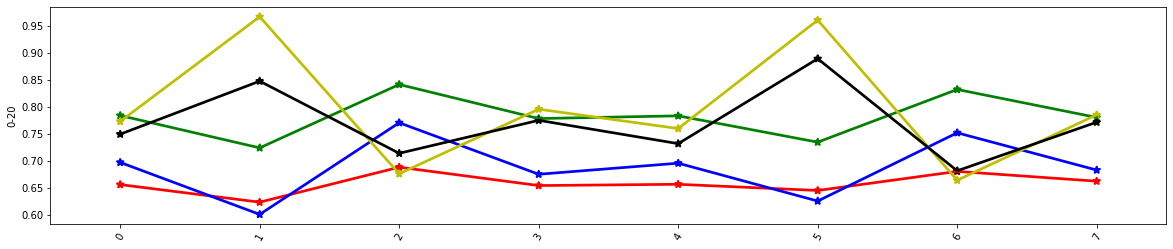

In [81]:
plt.figure(figsize=(20,4))
sns.pointplot(y='1-5' , x =Scores.index, data = Scores , color = 'r',markers=["*"])
sns.pointplot(y='6-10' , x =Scores.index, data = Scores , color = 'b',markers=["*"])
sns.pointplot(y='11-15' , x =Scores.index, data = Scores , color = 'g',markers=["*"])
sns.pointplot(y='16-20' , x =Scores.index, data = Scores , color = 'y',markers=["*"])
sns.pointplot(y='0-20' , x =Scores.index, data = Scores , color = 'black',markers=["*"])
#plt.ylabel('score')
plt.xticks(rotation=60)
plt.legend(loc='bottom left', frameon=False)